[*********************100%***********************]  1 of 1 completed
Date
2023-04-28    0.004980
2023-05-02   -0.012401
2023-05-03    0.001981
2023-05-04   -0.011016
2023-05-05    0.009841
Name: Daily Returns, dtype: float64


<AxesSubplot:title={'center':'Daily Returns of FTSE 100 (Last 5 Years)'}, xlabel='Date'>

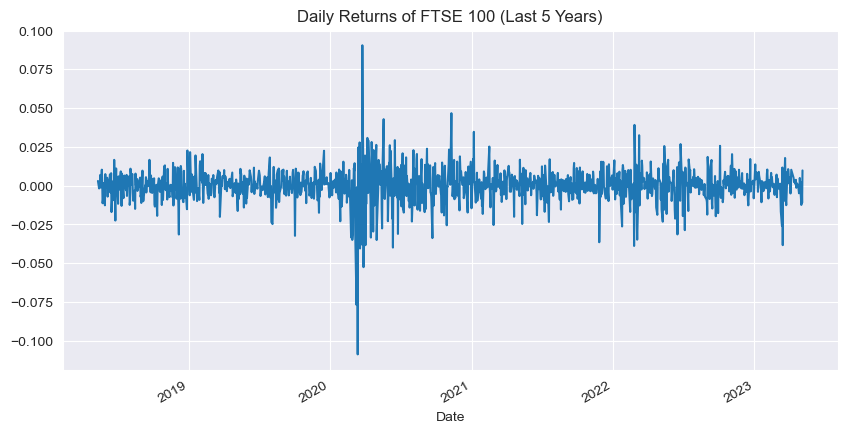

In [17]:
import pandas as pd
import yfinance as yf

# Set the start and end dates for the data extraction
start_date = '2018-05-10'
end_date = '2023-05-09'

# Extract the historical prices for FTSE 100 from Yahoo Finance
nifty_data = yf.download('^FTSE', start=start_date, end=end_date, interval='1d')

# Calculate the daily returns based on the adjusted closing prices
nifty_data['Daily Returns'] = nifty_data['Adj Close'].pct_change()

# Drop the first row (which contains NaN value) from the dataframe
nifty_data.dropna(inplace=True)

# Filter the data for the last 5 years
daily_returns = nifty_data['Daily Returns'].loc['2018-05-11':]

# Print the last 5 rows of the daily returns data
print(daily_returns.tail())

# Plot a graph of the daily returns over time
daily_returns.plot(figsize=(10,5), title='Daily Returns of FTSE 100 (Last 5 Years)')

[*********************100%***********************]  1 of 1 completed
Date
2023-05-05    0.009841
2023-05-09   -0.001838
2023-05-10   -0.002937
2023-05-11   -0.001382
2023-05-12    0.003105
Name: Daily Returns, dtype: float64
       Mean    Median  Maximum   Minimum   Std Dev  Skewness   Kurtosis
0  0.000068  0.000647  0.09053 -0.108738  0.011247  -0.87111  13.406542


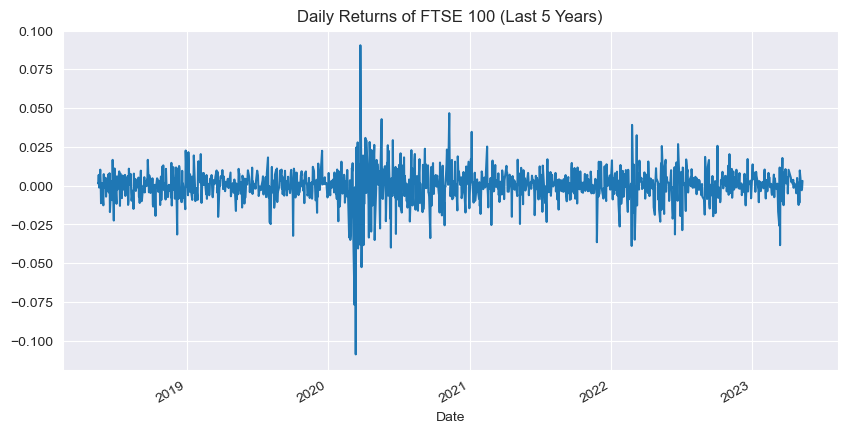

In [14]:
import pandas as pd
import yfinance as yf

# Set the start and end dates for the data extraction
start_date = '2018-05-13'
end_date = '2023-05-13'

# Extract the historical prices for FTSE 100 from Yahoo Finance
nifty_data = yf.download('^FTSE', start=start_date, end=end_date, interval='1d')

# Calculate the daily returns based on the adjusted closing prices
nifty_data['Daily Returns'] = nifty_data['Adj Close'].pct_change()

# Drop the first row (which contains NaN value) from the dataframe
nifty_data.dropna(inplace=True)

# Filter the data for the last 5 years
daily_returns = nifty_data['Daily Returns'].loc['2018-05-14':]

# Print the last 5 rows of the daily returns data
print(daily_returns.tail())

# Plot a graph of the daily returns over time
daily_returns.plot(figsize=(10,5), title='Daily Returns of FTSE 100 (Last 5 Years)')

# Calculate the statistics of the daily returns
stats_df = pd.DataFrame({
    'Mean': daily_returns.mean(),
    'Median': daily_returns.median(),
    'Maximum': daily_returns.max(),
    'Minimum': daily_returns.min(),
    'Std Dev': daily_returns.std(),
    'Skewness': daily_returns.skew(),
    'Kurtosis': daily_returns.kurtosis()
}, index=[0])

print(stats_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


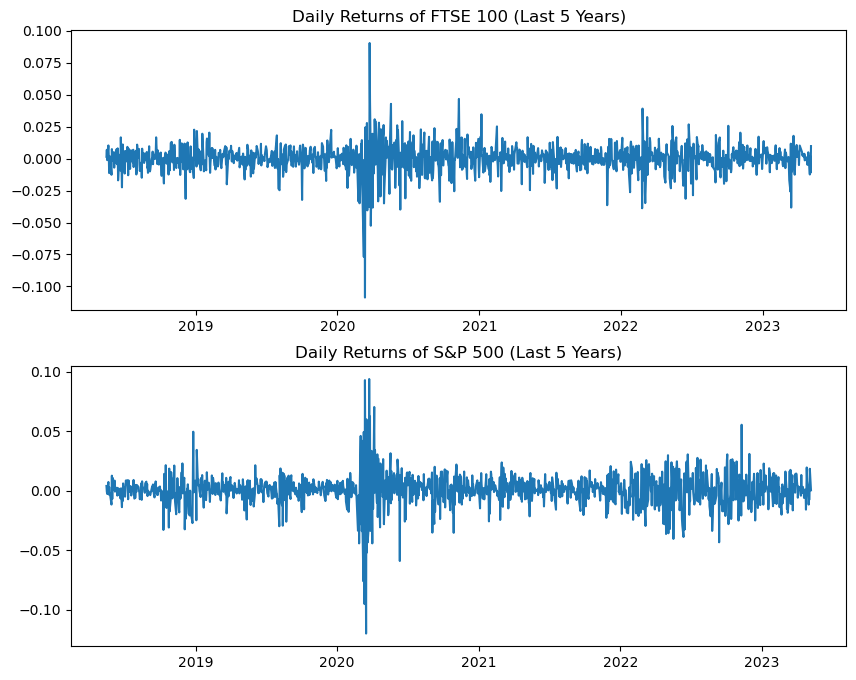

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Set the start and end dates for the data extraction
start_date = '2018-05-10'
end_date = '2023-05-09'

# Extract the historical prices for FTSE 100 and S&P500 from Yahoo Finance
ftse_data = yf.download('^FTSE', start=start_date, end=end_date, interval='1d')
sp500_data = yf.download('^GSPC', start=start_date, end=end_date, interval='1d')

# Calculate the daily returns based on the adjusted closing prices
ftse_data['Daily Returns'] = ftse_data['Adj Close'].pct_change()
sp500_data['Daily Returns'] = sp500_data['Adj Close'].pct_change()

# Drop the first row (which contains NaN value) from the dataframes
ftse_data.dropna(inplace=True)
sp500_data.dropna(inplace=True)

# Filter the data for the last 5 years
ftse_returns = ftse_data['Daily Returns'].loc['2018-05-16':'2023-05-09']
sp500_returns = sp500_data['Daily Returns'].loc['2018-05-16':'2023-05-09']

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the FTSE returns on the first subplot
ax1.plot(ftse_returns.index, ftse_returns.values)
ax1.set_title('Daily Returns of FTSE 100 (Last 5 Years)')

# Plot the S&P500 returns on the second subplot
ax2.plot(sp500_returns.index, sp500_returns.values)
ax2.set_title('Daily Returns of S&P 500 (Last 5 Years)')

# Display the plot
plt.show()

In [6]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

# Set the start and end dates for the data extraction
start_date = '2018-05-10'
end_date = '2023-05-09'

# Extract the historical prices for FTSE 100 from Yahoo Finance
ftse_data = yf.download('^FTSE', start=start_date, end=end_date, interval='1d')

# Calculate the daily returns based on the adjusted closing prices
ftse_data['Daily Returns'] = ftse_data['Adj Close'].pct_change()

# Drop the first row (which contains NaN value) from the dataframe
ftse_data.dropna(inplace=True)

# Filter the data for the last 5 years
daily_returns = ftse_data['Daily Returns'].loc['2018-05-10':]

# Perform the ADF test
result = adfuller(daily_returns)

# Print the test statistic, p-value, and critical values
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


[*********************100%***********************]  1 of 1 completed
ADF Statistic: -8.061369
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      5,   Neg. LLF: 6407.568746499458
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3643.1253435810086
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2000.4083378210917
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1817.7242682363199
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1816.6460533978131
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1816.4882004884475
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1816.4858400269386
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1816.4858299618386
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1816.4858299616476
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1816.4858299618386
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results           

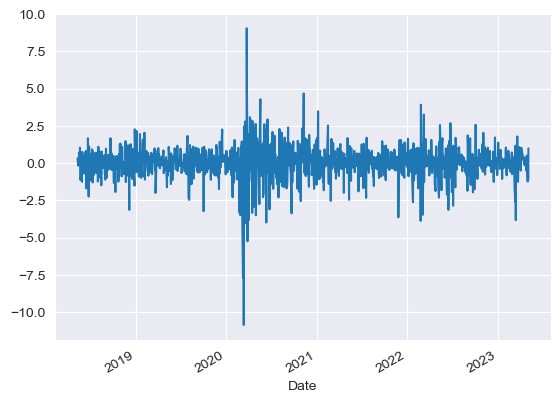

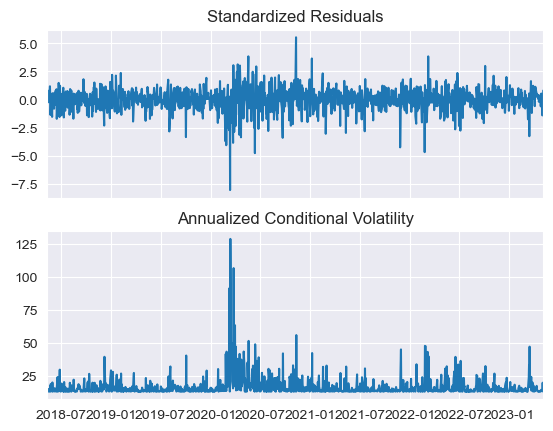

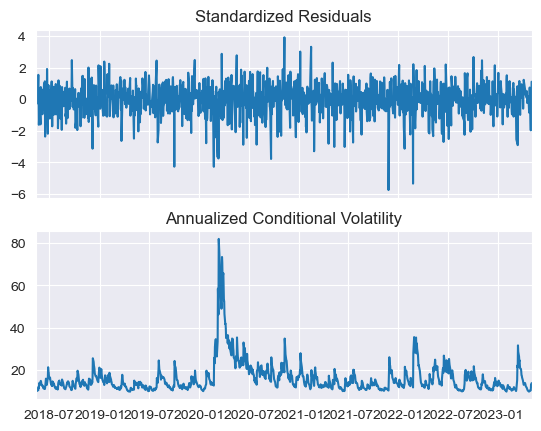

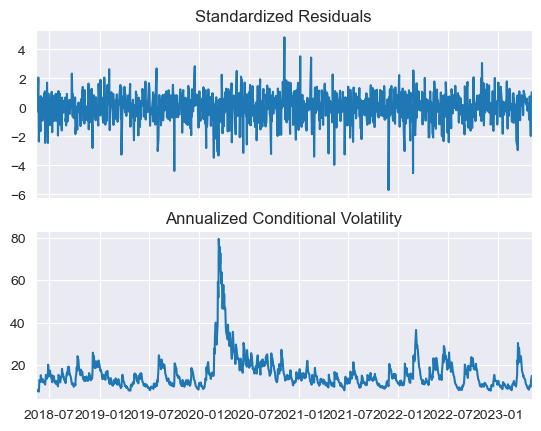

In [15]:
import matplotlib.pyplot as plt
import datetime as dt  # optional
import arch.data.sp500

st = dt.datetime(2018, 5, 10) # setting the date. Optional line.
en = dt.datetime(2023, 5, 9) # setting the date. Optional line.

import yfinance as yf
data = yf.download("^FTSE", start=st, end=en, adjusted=True)

market = data["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

#xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs


In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model

# Load data from yfinance
ticker = '^FTSE'
start_date = '2018-05-10'
end_date = '2023-05-09'
data = yf.download(ticker, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()

# Specify EGARCH model
model = arch_model(data, vol='EGARCH', p=1, o=1, q=1, power=2.0)

# Estimate model
res = model.fit()

# Print model summary
print(res.summary())

[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6.886645314272994e+20
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4012215948464.0664
Iteration:      3,   Func. Count:     31,   Neg. LLF: 8770981733189.806
Iteration:      4,   Func. Count:     41,   Neg. LLF: 9139.65969987112
Iteration:      5,   Func. Count:     50,   Neg. LLF: 3432230646.8545766
Iteration:      6,   Func. Count:     59,   Neg. LLF: -4104.925021740251
Iteration:      7,   Func. Count:     66,   Neg. LLF: -4107.828627337281
Iteration:      8,   Func. Count:     72,   Neg. LLF: -4107.870559874242
Iteration:      9,   Func. Count:     78,   Neg. LLF: -4107.875986038909
Iteration:     10,   Func. Count:     84,   Neg. LLF: -4107.876509124202
Iteration:     11,   Func. Count:     90,   Neg. LLF: -4107.876521542383
Iteration:     12,   Func. Count:     96,   Neg. LLF: -4107.876523701108
Iteration:     13,   Func. Count:    101,   Neg. LLF: -

C:\Users\grish\.conda\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
